In [22]:
#importing the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import adjustText as aT

# Shapefile

In [23]:
#reading the shapefile
gply = gpd.read_file('Stadtteile/Düsseldorf_Stadtteile.shp')

In [24]:
#dropping irrelevant columns 
columns_drop = ["OBJECTID", "Quelle", "Stand", "Stadtbezir", "Stadtteil", "SHAPE_Leng", "SHAPE_Area"]
gply.drop(labels = columns_drop, axis = "columns", inplace = True)

In [25]:
gply.dtypes

Name          object
geometry    geometry
dtype: object

In [26]:
#converting to standard crs
gply = gply.to_crs(4326)

In [27]:
gply.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
gply.head()

,Name,geometry
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ..."
1,Angermund,"POLYGON Z ((6.80952 51.34292 0.00000, 6.80943 ..."
2,Lörick,"POLYGON Z ((6.74610 51.25203 0.00000, 6.74380 ..."
3,Heerdt,"POLYGON Z ((6.73560 51.23767 0.00000, 6.73399 ..."
4,Oberkassel,"POLYGON Z ((6.76868 51.23195 0.00000, 6.76868 ..."


# Noise Data

In [29]:
#loading noise data
df = pd.read_csv('noise_c.csv')

In [30]:
df.dtypes

Address       object
DB_TAG         int64
DB_NACHT       int64
Latitude     float64
Longitude    float64
dtype: object

In [31]:
#converting the noise data to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude),crs='4326')

In [32]:
gdf.shape

(77018, 6)

In [33]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
gdf.head()

,Address,DB_TAG,DB_NACHT,Latitude,Longitude,geometry
0,"Aachener Straße 1, Düsseldorf, Germany",68,62,51.207592,6.776500,POINT (6.77650 51.20759)
1,"Aachener Straße 10, Düsseldorf, Germany",68,61,51.207128,6.776436,POINT (6.77644 51.20713)
2,"Aachener Straße 101, Düsseldorf, Germany",70,63,51.202533,6.771146,POINT (6.77115 51.20253)
3,"Aachener Straße 103, Düsseldorf, Germany",70,62,51.202428,6.771077,POINT (6.77108 51.20243)
4,"Aachener Straße 105, Düsseldorf, Germany",69,62,51.202332,6.771107,POINT (6.77111 51.20233)


# Choropleth

## Neighbourhood Choropleth - without noise data

In [35]:
chs=gply

In [36]:
#getting centroid to mark the labels for choropleth
chs["center"] = chs["geometry"].centroid

C:\Users\joe16\AppData\Local\Temp\ipykernel_14028\477071451.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chs["center"] = chs["geometry"].centroid


In [37]:
df_points = chs.copy()
df_points.set_geometry("center", inplace = True)

In [38]:
df_points.head()

,Name,geometry,center
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945)
1,Angermund,"POLYGON Z ((6.80952 51.34292 0.00000, 6.80943 ...",POINT (6.77812 51.33200)
2,Lörick,"POLYGON Z ((6.74610 51.25203 0.00000, 6.74380 ...",POINT (6.73149 51.24728)
3,Heerdt,"POLYGON Z ((6.73560 51.23767 0.00000, 6.73399 ...",POINT (6.71301 51.23290)
4,Oberkassel,"POLYGON Z ((6.76868 51.23195 0.00000, 6.76868 ...",POINT (6.75044 51.22997)


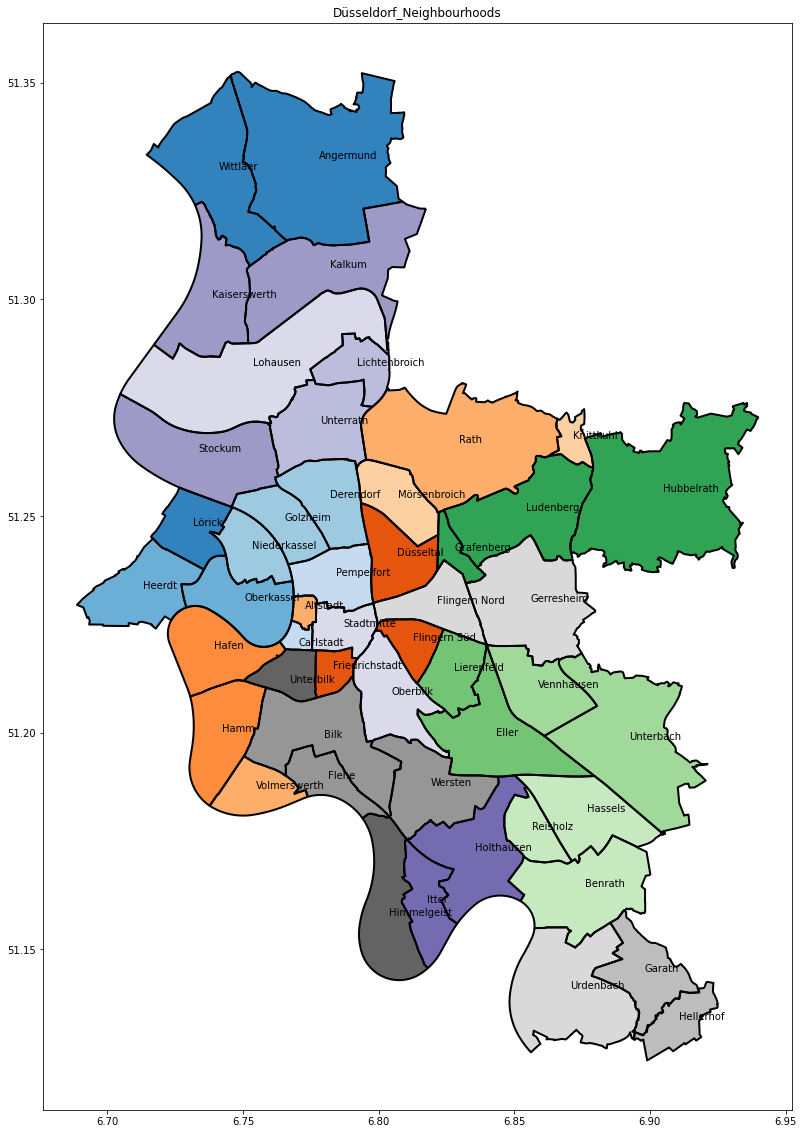

In [39]:
fig, ax = plt.subplots(figsize = (20,20)) 
gply.plot(cmap = 'tab20c',ax=ax)
gply.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

texts = []
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["Name"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1))

plt.title('Düsseldorf_Neighbourhoods')
plt.show()
fig.savefig('choropleth_dus_neighbourhoods.jpg', bbox_inches='tight', dpi=150)

## Neighbourhood Choropleth - noise data points

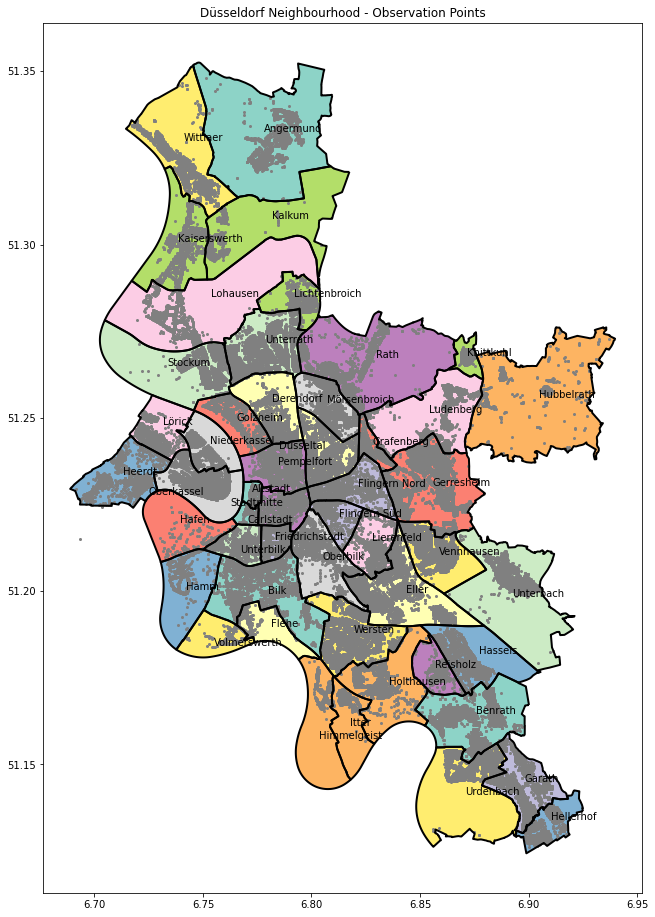

In [40]:
fig, ax = plt.subplots(figsize = (20,16)) 
gply.plot(column = 'Name',cmap = 'Set3',ax=ax)
gply.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
gdf.plot(ax=ax, markersize=4, color="grey", marker="o")
texts = []
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["Name"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1))

plt.title('Düsseldorf Neighbourhood - Observation Points')
plt.show()
fig.savefig('choropleth_points.jpg', bbox_inches='tight', dpi=150)

# Merge

In [41]:
#merging the data to find average and plot choropleth
m1=gpd.sjoin(gply,gdf,how='inner',op='contains')

C:\Users\joe16\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [42]:
m1.head()

,Name,geometry,center,index_right,Address,DB_TAG,DB_NACHT,Latitude,Longitude
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),65394,"Schulweg 14, Düsseldorf, Germany",50,41,51.324019,6.738590
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),40624,"Kalkstraße 16, Düsseldorf, Germany",50,42,51.324031,6.742087
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),13616,"Bockumer Straße 49c, Düsseldorf, Germany",61,52,51.324051,6.739528
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),8210,"An der Schanz 7, Düsseldorf, Germany",51,42,51.324113,6.741296
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),8202,"An der Schanz 10, Düsseldorf, Germany",54,45,51.324137,6.740668


In [43]:
m1.shape

(77014, 9)

In [44]:
#deleting irrelevant columns from the merged dataframe
del m1['index_right']
del m1['Address']
del m1['Latitude']
del m1['Longitude']

In [45]:
m1.head()

,Name,geometry,center,DB_TAG,DB_NACHT
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),50,41
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),50,42
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),61,52
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),51,42
0,Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),54,45


In [46]:
#groupby to find average
am1=m1.groupby(['Name']).agg({'DB_TAG':'mean','DB_NACHT':'mean'})

In [47]:
am1.head()

,DB_TAG,DB_NACHT
Name,,
Altstadt,57.699789,48.217759
Angermund,51.446281,42.895741
Benrath,58.261646,50.305124
Bilk,59.179613,51.136587
Carlstadt,60.528736,51.890805


In [48]:
chs.set_index('Name',inplace=True)

In [49]:
chs['Avg_Day']=am1['DB_TAG']
chs.head()

,geometry,center,Avg_Day
Name,,,
Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),53.339965
Angermund,"POLYGON Z ((6.80952 51.34292 0.00000, 6.80943 ...",POINT (6.77812 51.33200),51.446281
Lörick,"POLYGON Z ((6.74610 51.25203 0.00000, 6.74380 ...",POINT (6.73149 51.24728),53.602421
Heerdt,"POLYGON Z ((6.73560 51.23767 0.00000, 6.73399 ...",POINT (6.71301 51.23290),60.602572
Oberkassel,"POLYGON Z ((6.76868 51.23195 0.00000, 6.76868 ...",POINT (6.75044 51.22997),58.515371


In [50]:
chs['Avg_Night']=am1['DB_NACHT']
chs.head()

,geometry,center,Avg_Day,Avg_Night
Name,,,,
Wittlaer,"POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...",POINT (6.74111 51.32945),53.339965,45.046811
Angermund,"POLYGON Z ((6.80952 51.34292 0.00000, 6.80943 ...",POINT (6.77812 51.33200),51.446281,42.895741
Lörick,"POLYGON Z ((6.74610 51.25203 0.00000, 6.74380 ...",POINT (6.73149 51.24728),53.602421,45.645251
Heerdt,"POLYGON Z ((6.73560 51.23767 0.00000, 6.73399 ...",POINT (6.71301 51.23290),60.602572,53.483601
Oberkassel,"POLYGON Z ((6.76868 51.23195 0.00000, 6.76868 ...",POINT (6.75044 51.22997),58.515371,50.722032


In [52]:
chs.shape,chs.head()

((50, 4),
                                                      geometry  \
 Name                                                            
 Wittlaer    POLYGON Z ((6.76623 51.31355 0.00000, 6.76617 ...   
 Angermund   POLYGON Z ((6.80952 51.34292 0.00000, 6.80943 ...   
 Lörick      POLYGON Z ((6.74610 51.25203 0.00000, 6.74380 ...   
 Heerdt      POLYGON Z ((6.73560 51.23767 0.00000, 6.73399 ...   
 Oberkassel  POLYGON Z ((6.76868 51.23195 0.00000, 6.76868 ...   
 
                               center    Avg_Day  Avg_Night  
 Name                                                        
 Wittlaer    POINT (6.74111 51.32945)  53.339965  45.046811  
 Angermund   POINT (6.77812 51.33200)  51.446281  42.895741  
 Lörick      POINT (6.73149 51.24728)  53.602421  45.645251  
 Heerdt      POINT (6.71301 51.23290)  60.602572  53.483601  
 Oberkassel  POINT (6.75044 51.22997)  58.515371  50.722032  )

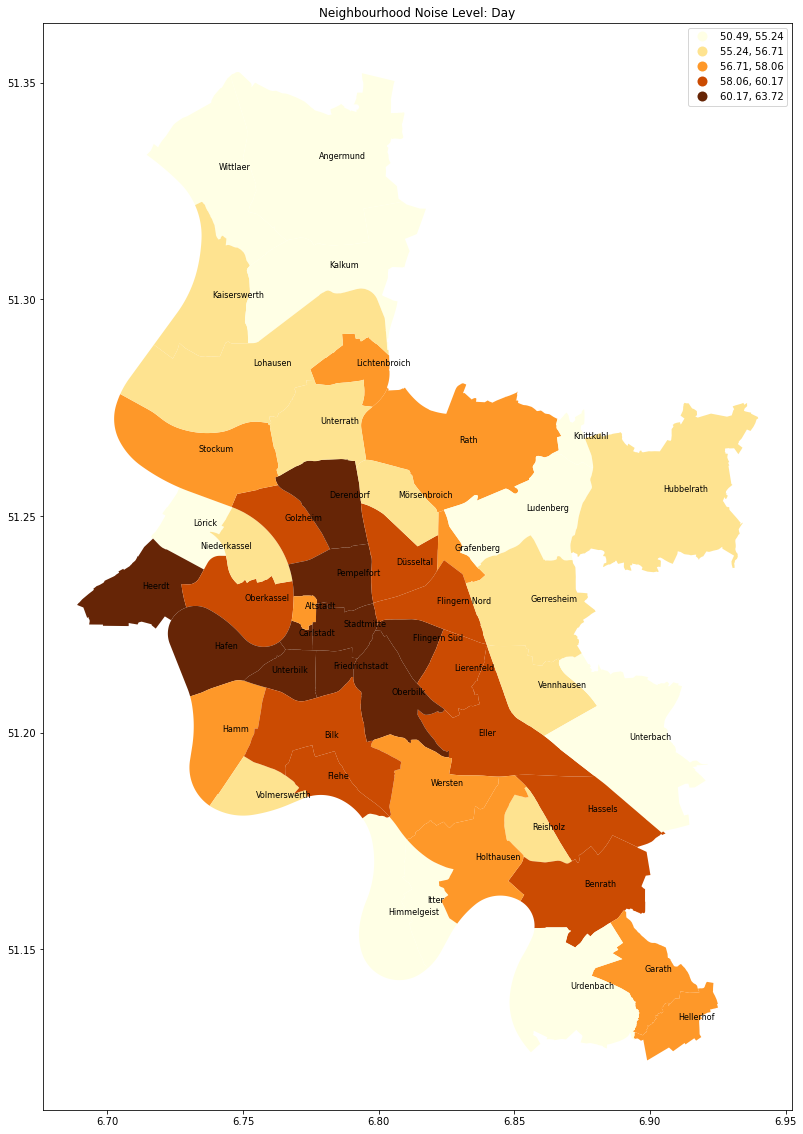

In [53]:
fig,ax=plt.subplots(figsize=(20,20),subplot_kw=dict(aspect='equal'))
gply.plot(column='Avg_Day',scheme='Quantiles',k=5,cmap='YlOrBr',legend=True,ax=ax)
plt.title('Neighbourhood Noise Level: Day')
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["Name"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1))
plt.show()
fig.savefig('choropleth_day.jpg', bbox_inches='tight', dpi=150)

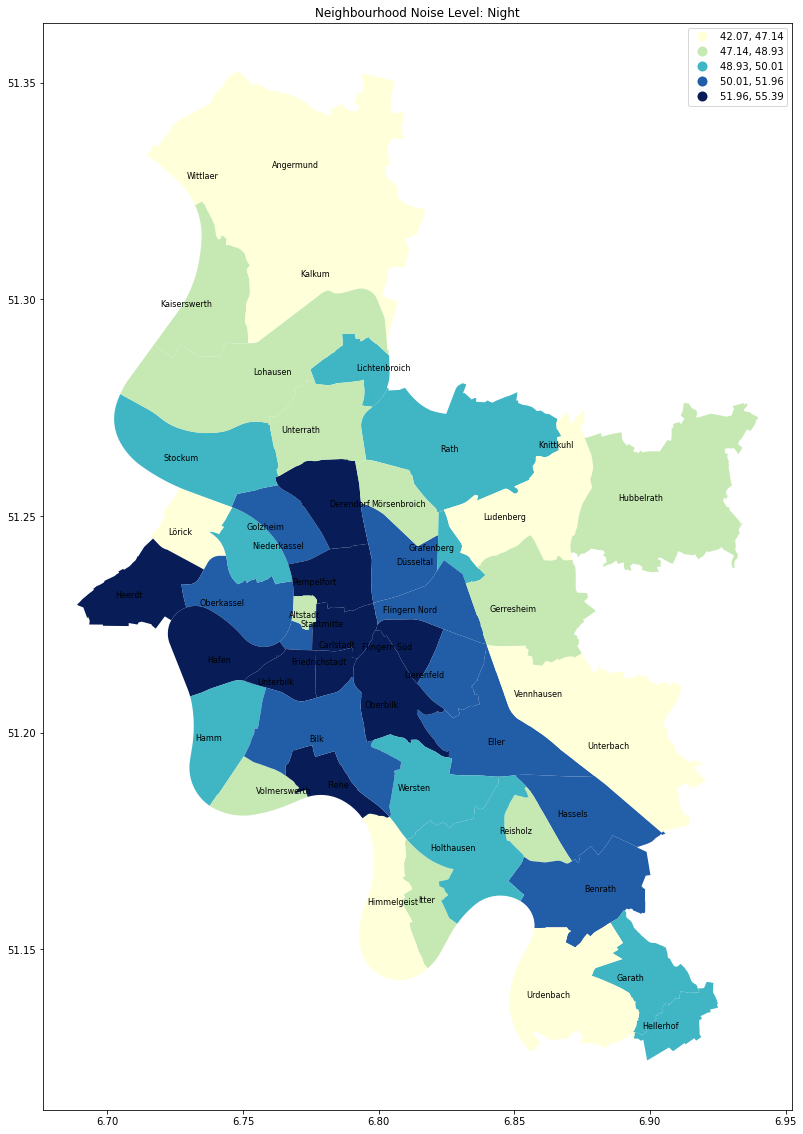

In [54]:
fig,ax=plt.subplots(figsize=(20,20),subplot_kw=dict(aspect='equal'))
gply.plot(column='Avg_Night',scheme='Quantiles',k=5,cmap='YlGnBu',legend=True,ax=ax)
plt.title('Neighbourhood Noise Level: Night')
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["Name"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1))
plt.show()
fig.savefig('choropleth_night.jpg', bbox_inches='tight', dpi=150)